## Task-D: Collinear features and their effect on linear models

In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
data = pd.read_csv('task_d.csv')

In [11]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [20]:
data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

In [12]:
X = data.drop(['target'], axis=1)
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.33,stratify=Y)

In [14]:
noisy_X= X + np.random.random_integers(1,9,(100,7))*(10**-2)

In [15]:
nX_train,nX_test,ny_train,ny_test = train_test_split(noisy_X.values,Y,test_size=0.33,stratify=Y)

In [33]:
def allSteps(hp_space,loss_function):
    print("Started Grid Search")
    model = SGDClassifier(loss=loss_function)
    gs = GridSearchCV(model,n_jobs=10,param_grid=hp_space,scoring='roc_auc',cv=10,return_train_score=True)
    gs.fit(X_train,y_train)
    print("The best parameter aplha is : ",gs.best_params_)
    print(40*"#*")
    best_model = SGDClassifier(loss=loss_function,alpha=gs.best_params_["alpha"])
    best_model.fit(X_train,y_train)
    w = best_model.coef_
    acc = accuracy_score(y_test,best_model.predict(X_test))
    print(f"The accuracy score for the best model is {acc}")
    print(f"weights are : {w[0]}")
    print(20*"#*")
    print("Noise added")
    best_model.fit(nX_train,ny_train)
    w_ = best_model.coef_
    acc_ = accuracy_score(ny_test,best_model.predict(nX_test))
    print(f"The accuracy score for the best model is {acc_}")
    print(f"weights are : {w_[0]}")
    print(20*"#*")
    print(f"The deviations in the weights are {np.abs(w-w_)[0]}")
    print(f"The difference in accuracy {acc - acc_}")
    print(20*"#*")
    print("Top 4 features")
    mpa = []
    for idx,val in enumerate(np.abs(w-w_)[0]):
        mpa.append([idx,val])
    mpa.sort(key=lambda x:x[1],reverse=True) 
    print(data.columns[[i for i,val in mpa[:4] ]])
    return w,w_

### 1. Finding the Correlation between the features

<AxesSubplot:>

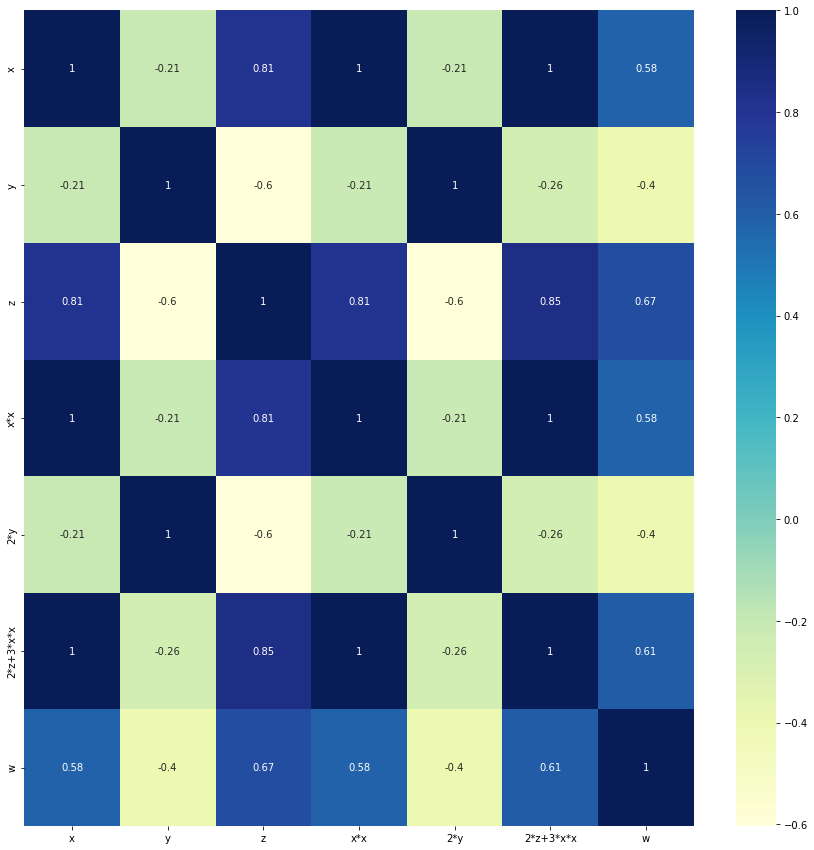

In [34]:
fig ,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True,ax=ax)

In [35]:
w,w_ = allSteps({"alpha":[ 0.00001,0.0001,0.001,0.01,0.1]},"log_loss")

Started Grid Search
The best parameter aplha is :  {'alpha': 1e-05}
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
The accuracy score for the best model is 1.0
weights are : [ 24.2533602  -13.7570868   18.32110779  25.31650642 -13.7570868
  24.99703719   6.73528049]
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
Noise added
The accuracy score for the best model is 1.0
weights are : [ 7.54856476 -7.55719319 13.06062542  7.65345841 -7.43824644  8.0233286
 -1.64722487]
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
The deviations in the weights are [16.70479543  6.19989361  5.26048238 17.66304802  6.31884036 16.97370859
  8.38250536]
The difference in accuracy 0.0
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
Top 4 features
Index(['x*x', '2*z+3*x*x', 'x', 'w'], dtype='object')


In [36]:
w,w_ = allSteps({"alpha":[ 0.00001,0.0001,0.001,0.01,0.1]},"hinge")

Started Grid Search
The best parameter aplha is :  {'alpha': 1e-05}
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
The accuracy score for the best model is 0.9696969696969697
weights are : [  3.31682936 -24.09033399  38.00563572   3.25341984 -24.09033399
   7.51661084  30.48188466]
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
Noise added
The accuracy score for the best model is 1.0
weights are : [ 27.95471003 -24.2889635   31.38898206  25.10590578 -23.3039704
  25.17318367  19.33546934]
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
The deviations in the weights are [24.63788066  0.19862951  6.61665367 21.85248594  0.78636358 17.65657283
 11.14641532]
The difference in accuracy -0.030303030303030276
#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*#*
Top 4 features
Index(['x', 'x*x', '2*z+3*x*x', 'w'], dtype='object')


# Observation
When noise was add the accuracy of both __logistic regression and SVM__ increased also for both the case<br> 